In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Pokemon.csv', index_col = 0,encoding = 'latin1')

In [5]:
df.head()


Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
#                                                                            
1   Bulbasaur  Grass  Poison    318  45      49       49       65       65   
2     Ivysaur  Grass  Poison    405  60      62       63       80       80   
3    Venusaur  Grass  Poison    525  80      82       83      100      100   
4  Charmander   Fire     NaN    309  39      52       43       60       50   
5  Charmeleon   Fire     NaN    405  58      64       58       80       65   

   Speed  Stage  Legendary  
#                           
1     45      1      False  
2     60      2      False  
3     80      3      False  
4     65      1      False  
5     80      2      False

# Scatter Plot

In [6]:
Scatter_Plot = sns.lmplot( x= 'Attack', y= 'Defense', data = df)
Scatter_Plot

In [7]:
# To remove the regression line
Scatter_Plot = sns.lmplot( x= 'Attack', y= 'Defense', data = df, fit_reg = False)
Scatter_Plot

In [8]:
# Add third dimension with hue

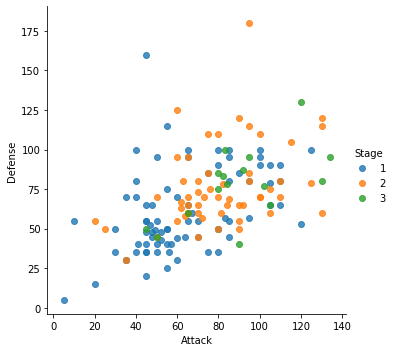

In [9]:
Scatter_Plot = sns.lmplot( x= 'Attack', y= 'Defense', data = df, fit_reg = False, hue = 'Stage')
Scatter_Plot

(0, 141.9881096001028)

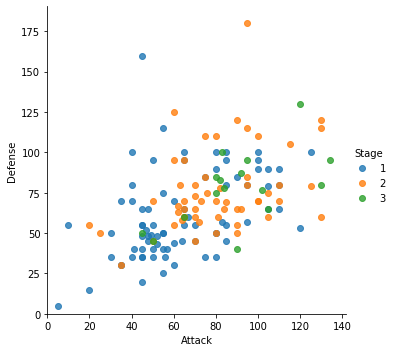

In [10]:
# Setting the axis limits with Matplotlib

Scatter_Plot = sns.lmplot( x= 'Attack', y= 'Defense', data = df, fit_reg = False, hue = 'Stage')
Scatter_Plot
plt.ylim(0, None)
plt.xlim(0,None)

# Role of Pandas

# Box plot

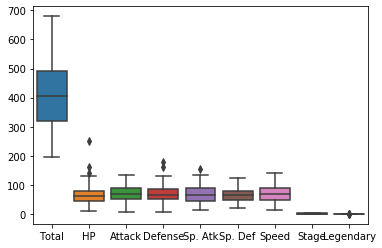

In [11]:
Boxplot = sns.boxplot(data = df)
Boxplot

In [12]:
# Dropping the not so useful data line Total(since we have individual data), Stage and Legendary(since it is not a combat data)

In [13]:
stats_df = df.drop(['Total','Stage','Legendary'], axis = 1)

In [14]:
stats_df.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
#                                                                         
1   Bulbasaur  Grass  Poison  45      49       49       65       65     45
2     Ivysaur  Grass  Poison  60      62       63       80       80     60
3    Venusaur  Grass  Poison  80      82       83      100      100     80
4  Charmander   Fire     NaN  39      52       43       60       50     65
5  Charmeleon   Fire     NaN  58      64       58       80       65     80

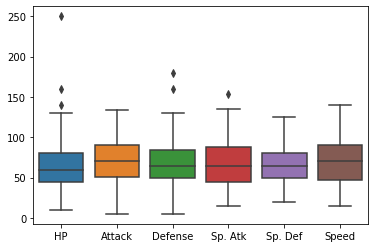

In [15]:
sns.boxplot(data = stats_df)
# New box plot without Total, Stage and Legendary

In [16]:

sns.set_style('whitegrid')
Violinplot = sns.violinplot(x='Type 1', y='Attack', data=df)
Violinplot

# Change colours of the plot

In [17]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
# Source - Bulbapedia

sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

# Swarmplots

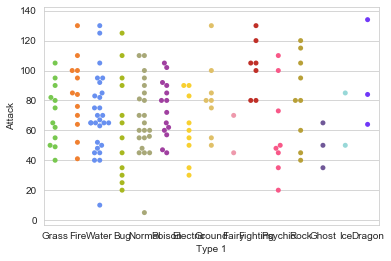

In [18]:
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)
# Swarmplots = This visualization will show each point, while "stacking" those with similar values

# Overlaying Plots

Text(0.5, 1.0, 'Attack by Type')

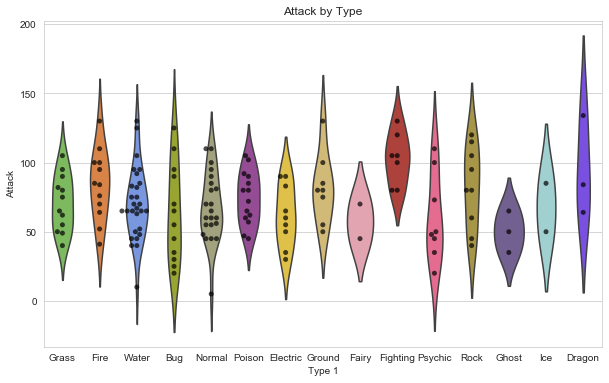

In [19]:
plt.figure(figsize=(10,6))

sns.violinplot(x = 'Type 1', y = 'Attack', data = df, inner = None, palette = pkmn_type_colors)
sns.swarmplot(x = 'Type 1', y = 'Attack', data = df, color = 'k', alpha = 0.7)

plt.title('Attack by Type')

# Using melt() to shorten the data

In [20]:
melted_df = pd.melt(stats_df, id_vars = ['Name', 'Type 1', 'Type 2'], var_name = 'Stat')
melted_df.head()

Name Type 1  Type 2 Stat  value
0   Bulbasaur  Grass  Poison   HP     45
1     Ivysaur  Grass  Poison   HP     60
2    Venusaur  Grass  Poison   HP     80
3  Charmander   Fire     NaN   HP     39
4  Charmeleon   Fire     NaN   HP     58

In [21]:
melted_swarmplot = sns.swarmplot( x = 'Stat', y = 'value', data = melted_df, hue = 'Type 1')
melted_swarmplot

# Finally, let's make a few final tweaks for a more readable chart:

# Enlarge the plot.
# Separate points by hue using the argument split=True .
 # Use our custom Pokemon color palette.
# Adjust the y-axis limits to end at 0.
# Place the legend to the right

In [22]:
# Enlarge the Plot
plt.figure(figsize = (10,6))
sns.swarmplot( x = 'Stat', y = 'value', data = melted_df, hue = 'Type 1', 
              dodge = True, # Separate points by hue
              palette = pkmn_type_colors )# Use our custom palette
plt.ylim(0,260) # Adjust the y- axis limits
plt.legend(bbox_to_anchor = (1,1) # Coordinate position of the legend
           ,loc = 2) # Place legend to the right

# Heat maps

In [23]:
corr = stats_df.corr()
sns.heatmap(corr)

# Histogram 

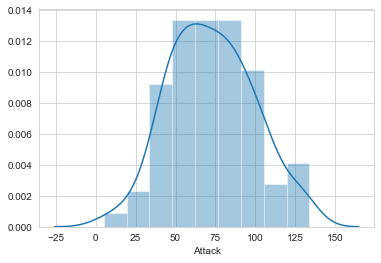

In [24]:
histogram = sns.distplot(df.Attack)

# Bar plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

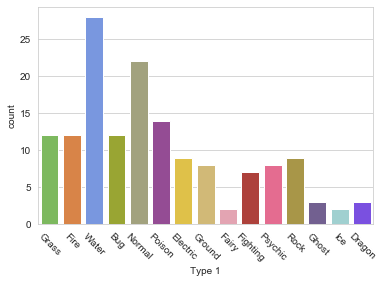

In [25]:
 Bar_plot = sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 plt.xticks(rotation=-45)

# Factor Plot

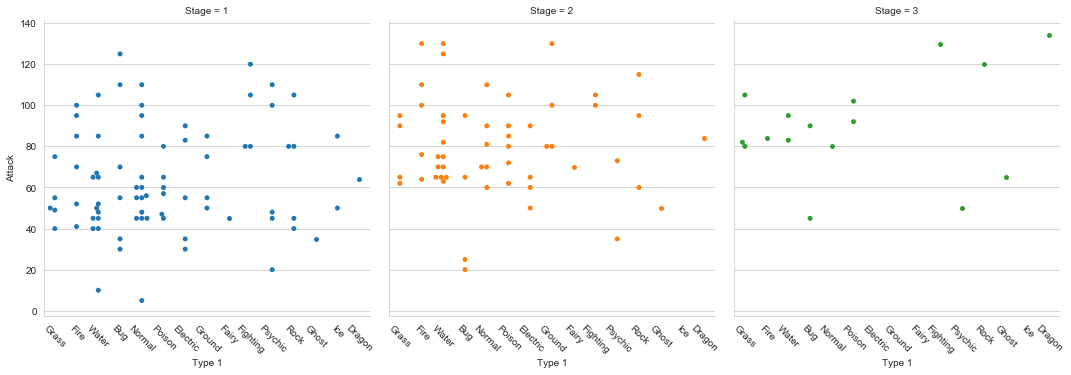

In [32]:
Factor_plot = sns.factorplot( x = 'Type 1', y = 'Attack', data = df, 
                            hue = 'Stage', # Colour by stage
                            col = 'Stage', # Separate by stage
                            kind = 'swarm') # Type of Plot
Factor_plot.set_xticklabels(rotation=-45)

# Density Plot

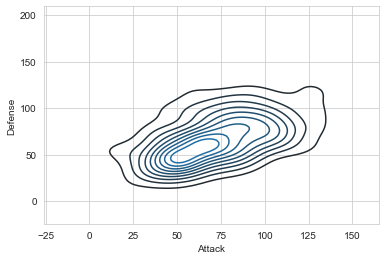

In [34]:
sns.kdeplot(df.Attack, df.Defense)